# 作业1：Titanic生存数据分析


## 数据集介绍
Titanic生存数据是Kaggle上的经典入门比赛的数据集，主要反映不同属性的乘客的生存情况，下面对各个属性进行简单的描述：
* PassengerId: 乘客唯一的ID
* Survived: 是否存活，1表示存活，0表示死亡
* Pclass：乘客所属的船舱等级
* Name: 乘客姓名
* Sex：乘客性别
* Age：乘客年龄
* SibSp：乘客的兄弟姊妹和配偶总数
* Parch：乘客的父母子女总数
* Ticket：乘客的票号
* Fare：乘客的票价
* Cabin：乘客的座位号
* Embarked：乘客的出发地点

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## 加载数据集
加载训练数据集，并且通过descibe()方法和isnull()方法对数据集进行简单的初步分析

In [3]:
test_data = pd.read_csv("kaggle/input/titanic/test.csv")
train_data = pd.read_csv("kaggle/input/titanic/train.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

可以通过missingno库可视化的查看缺失的数据情况，可以看到乘客的年龄和Cabin信息缺失比较严重

<AxesSubplot:>

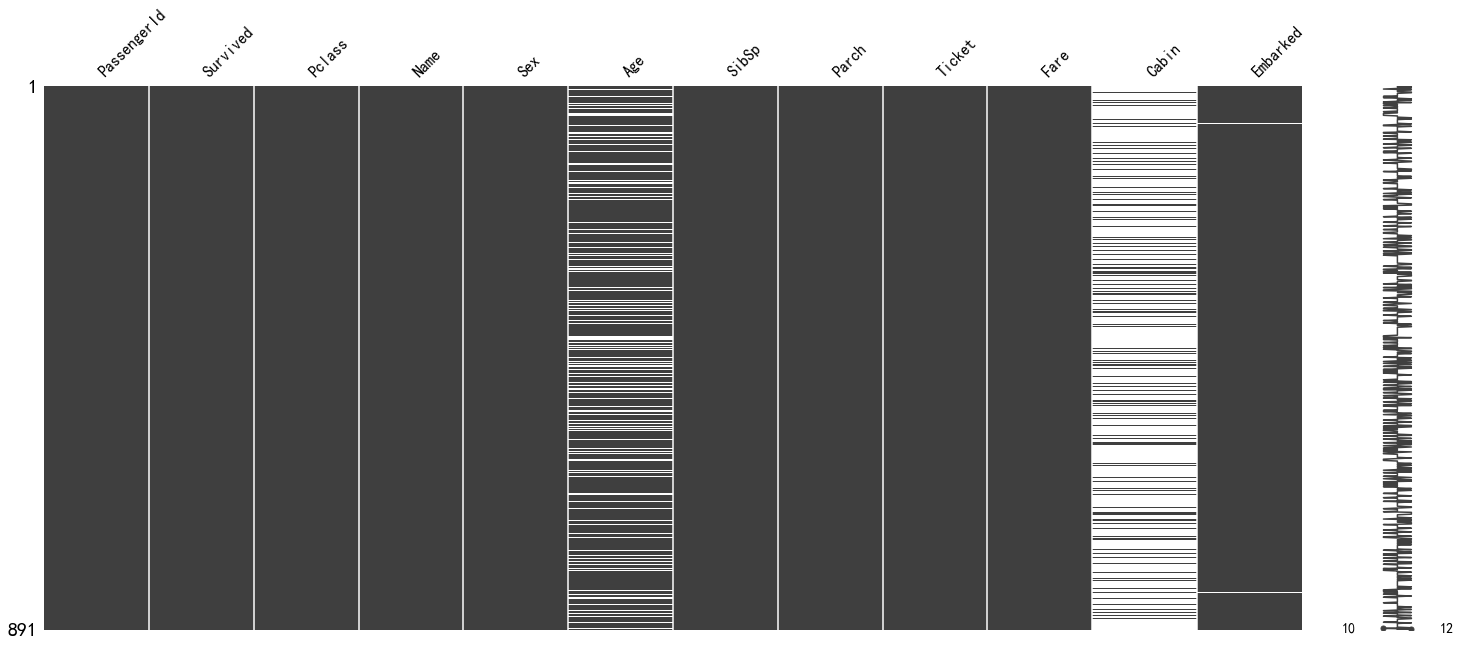

In [6]:
import missingno as msno
msno.matrix(train_data)

为了更好的对缺失的数据进行处理，我们先通过missingno库方法查看缺失数据的heatmap，以期找到缺失数据与其它数据的相关性，我们通过结果得知它们之间的联系不大，可以单独进行处理

<AxesSubplot:>

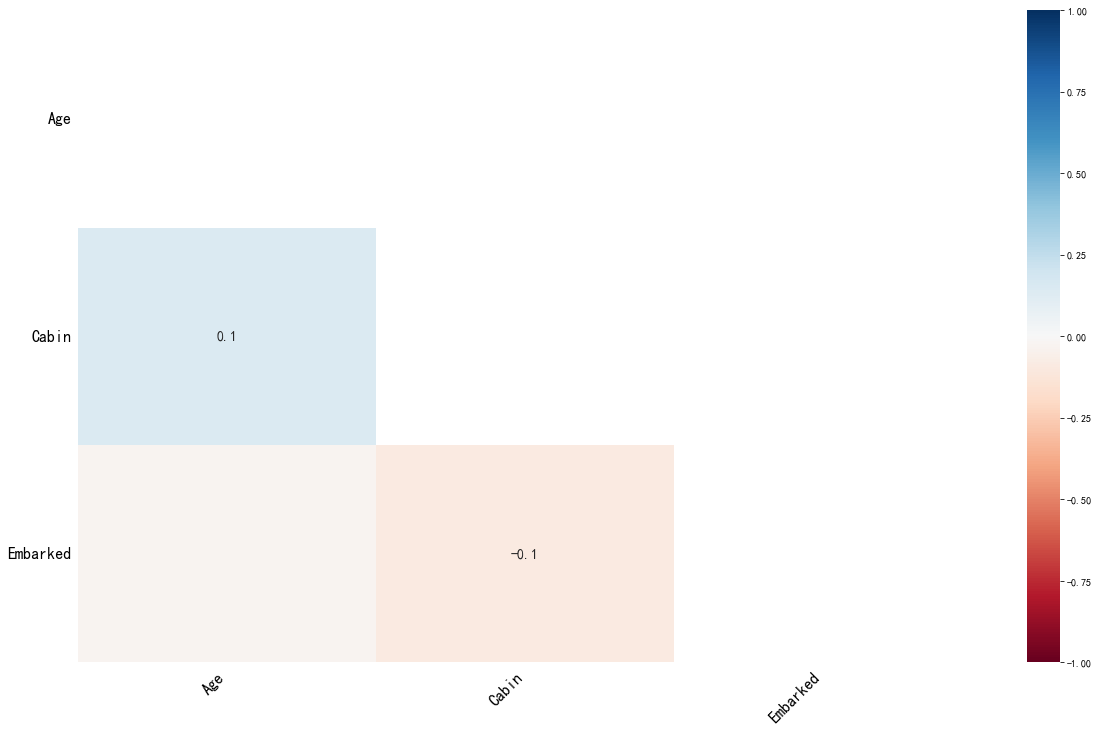

In [7]:
msno.heatmap(train_data)

## 数据预处理


首先由于年龄比较重要且会影响到分析结果，我打算使用随机森林对Age进行填补，在此次实验中暂时不作处理。

为了填补缺失数较少的Embarked(登船港口)信息，我们可以先通过饼状图了解Embarked的分布，并且选择分布最多的编号来进行填补。

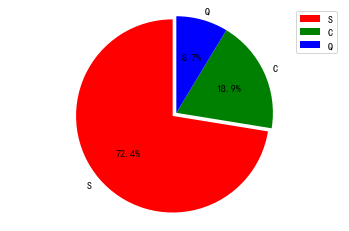

In [8]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

label_list = ["S", "C", "Q"]
size = [train_data['Embarked'].value_counts()[0], train_data['Embarked'].value_counts()[1], train_data['Embarked'].value_counts()[2]]
color = ["red", "green", "blue"]     
explode = [0.05, 0, 0]

patches, l_text, p_text = plt.pie(size, explode=explode, colors=color, labels=label_list, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6)
plt.axis("equal")
plt.legend()
plt.show()



从上图得知，大部分乘客的Embarked都是S，所以我们合理猜测缺失数据为'S'的可能性最大

In [9]:
train_data['Embarked'].fillna('S', inplace = True)

Cabin在数据中是缺失的，我们可以将其设置为缺失值，并且将其设置为字符串类型

In [10]:
train_data['Cabin'].fillna('U', inplace = True)

In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

## 数据分析
通过一些列分析与操作除去缺失值后，下面就要对数据进行分析。为了直观的展示出生存率与其他数据的关系，我首先使用scatter matrix(矩阵散点图)来展示相关性，并且给出heatmap。

array([[<AxesSubplot:xlabel='PassengerId', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Survived', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Pclass', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Age', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='SibSp', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Parch', ylabel='PassengerId'>,
        <AxesSubplot:xlabel='Fare', ylabel='PassengerId'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>],
       [<AxesSubplot:xlabel='PassengerId', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='

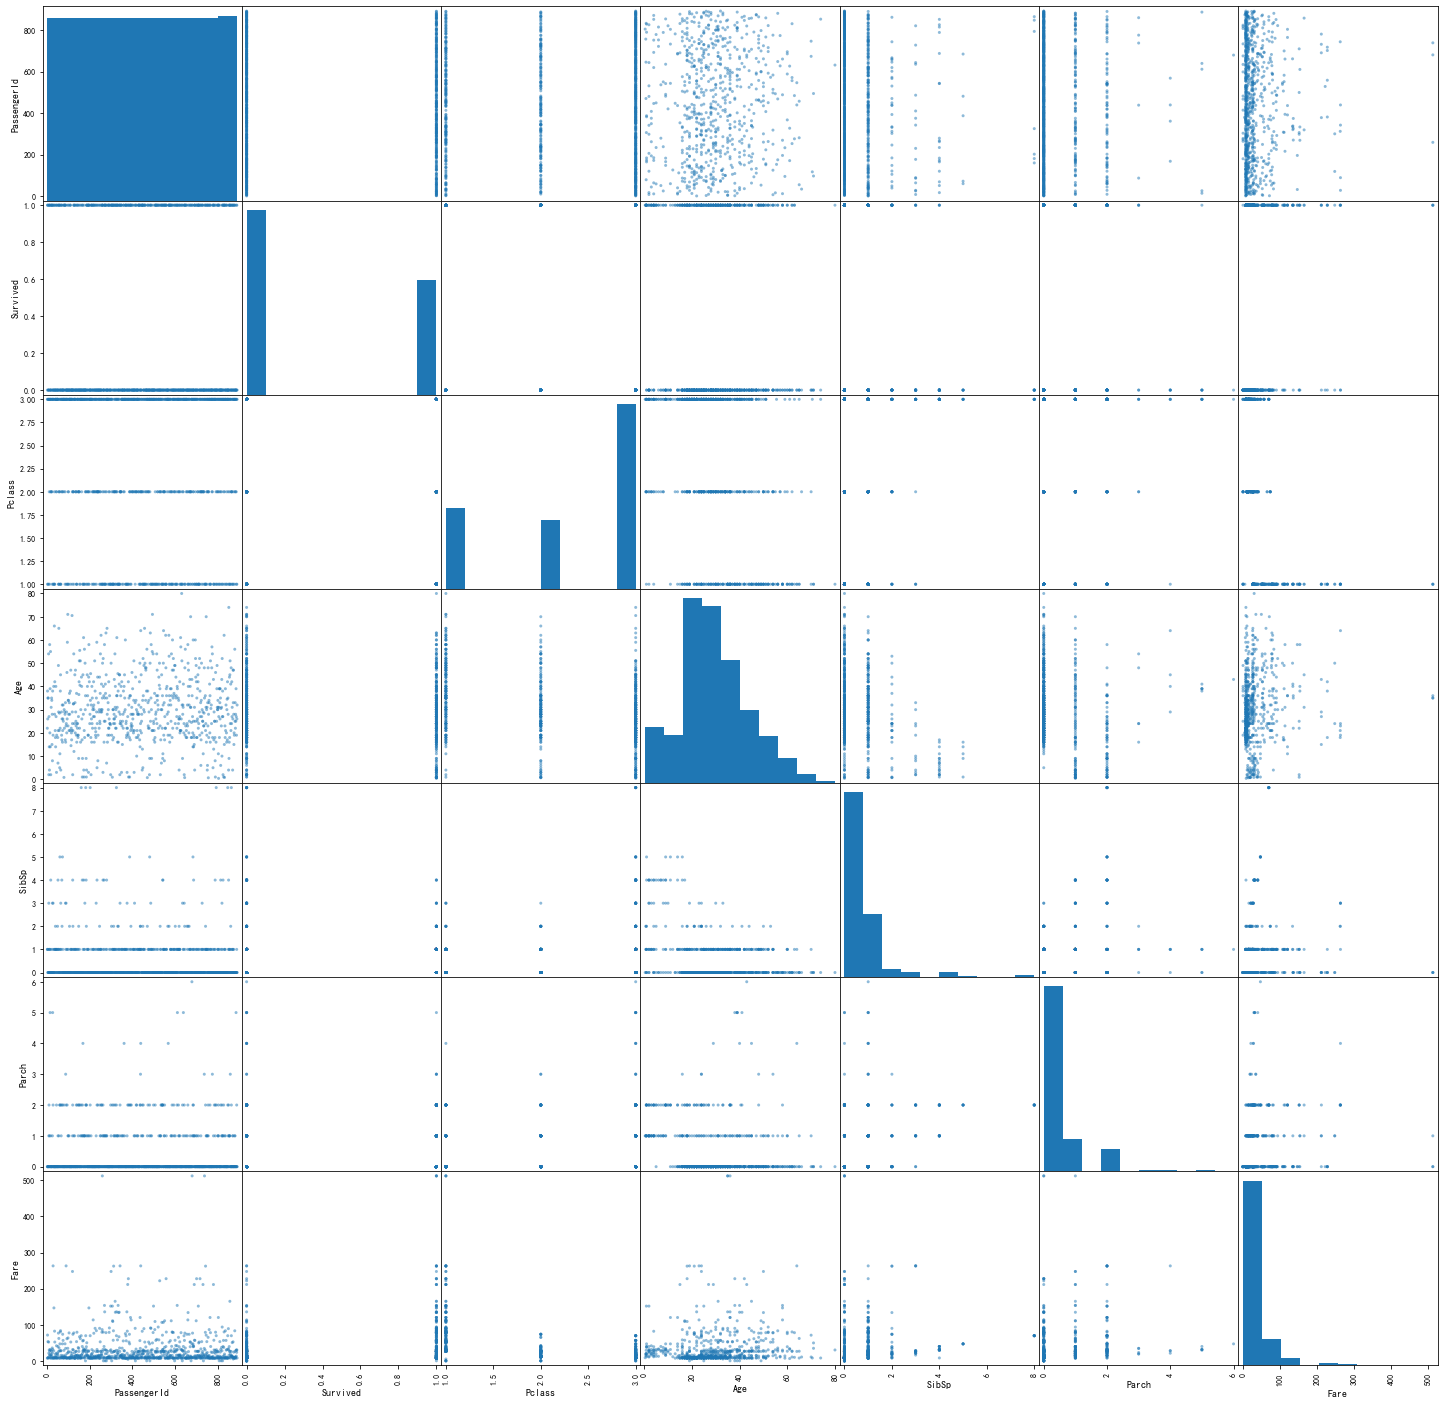

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_data, figsize = (25, 25))

(7.5, -0.5)

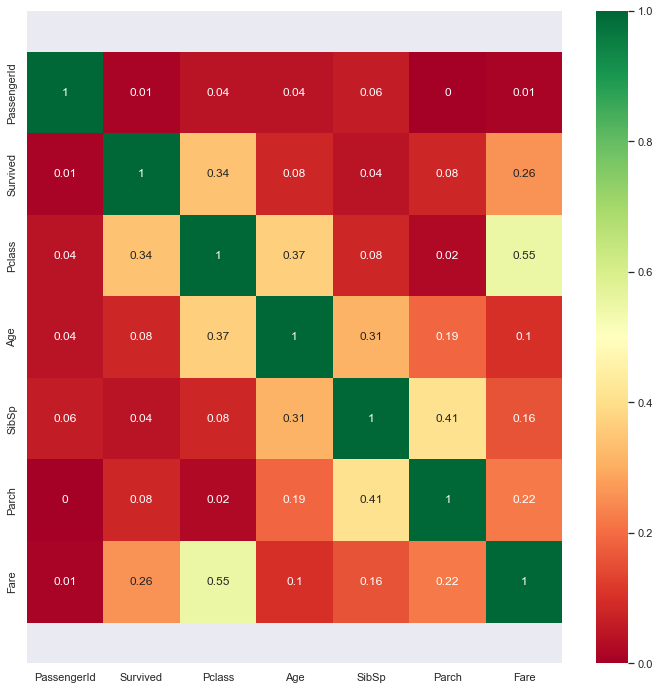

In [13]:
import seaborn as sns
correlation_matrix = np.absolute(train_data.corr().round(2))
sns.set(rc={'figure.figsize':(12, 12)})
ax = sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

从上面两张图我们可以直观地看到一些关系。比如生存率可能与PClass(舱位)，Fare(票价)联系比较紧密，后续操作可能会优先从这两个因素入手。同时从heatmap我们也可得知票价与舱位的相关性比较大，符合直觉。下面就要使用条形图和箱线图等对生存率与其他数据之间的联系进行进一步的分析。

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

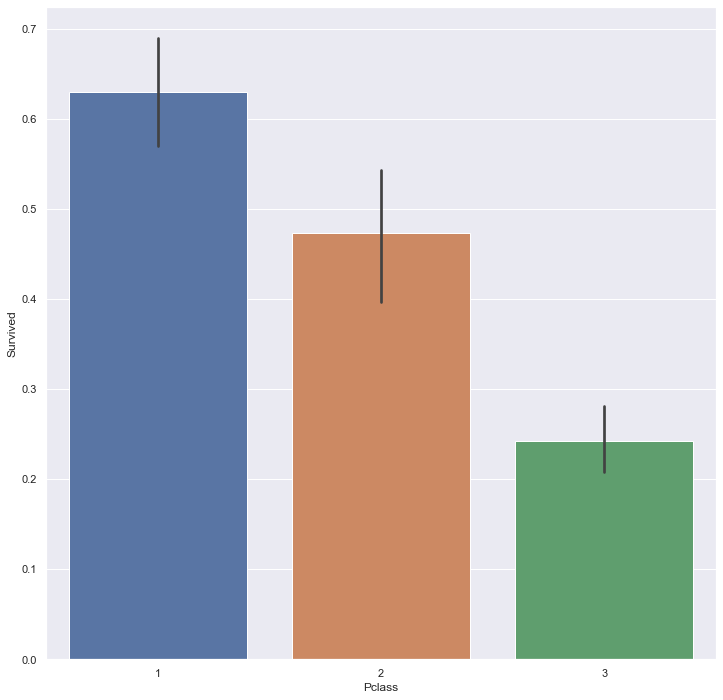

In [14]:
sns.barplot(x='Pclass',y='Survived',data=train_data)

从上条形可以看到生存率与舱位之间的关系，舱位1的生存率明显高于其他两个舱位，达到了62%左右的生存率。

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

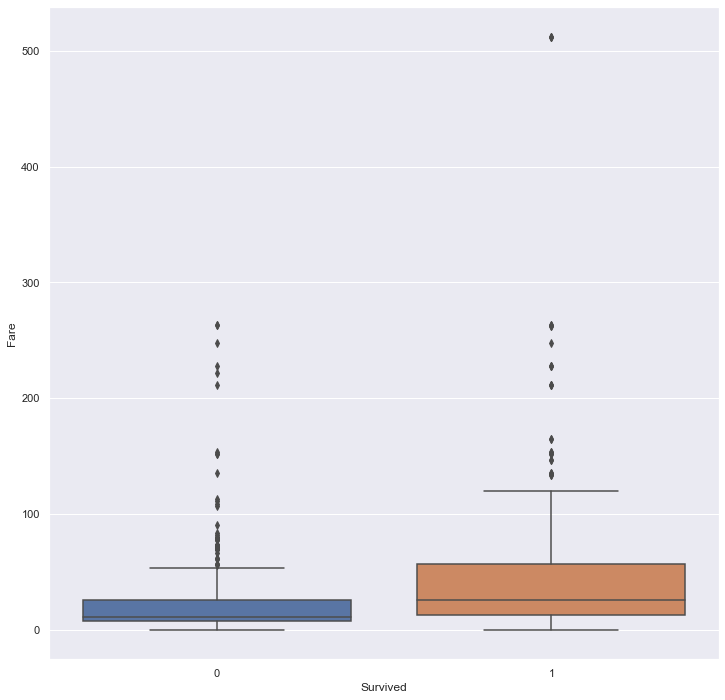

In [15]:
sns.boxplot(x='Survived',y='Fare',data=train_data)

前面我们提到过票价与舱位联系比较紧密，所以我们就可以推测生存率与票价也有一定的联系，在这里我们通过箱线图来可视化两者之间的关系。从上图可以看到，生存下来的乘客购买的票价明显高于死亡乘客。除了舱位与票价之外，我们不难通过经验推测出性别和年龄也与生存率有一定的关系。下面我们就借助几个常用的可视化工具来进行分析。

首先可以对乘客的年龄分布做一个简单分析，获取大概的认知。通过直方图可以得知年龄分布主要集中在20-40岁之间。并且我还使用Q-Q图去分析年龄分布是否符合正态分析，但从结果来看年龄的正态分布趋势不明显。

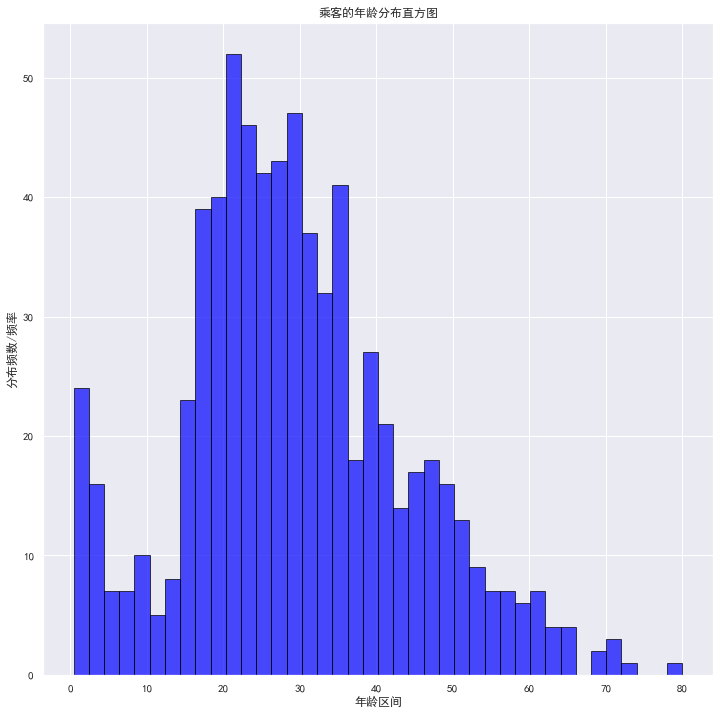

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['axes.unicode_minus'] = False     

plt.hist(train_data['Age'], bins = 40, facecolor = "blue", edgecolor = "black", alpha = 0.7)
plt.xlabel("年龄区间")
plt.ylabel("分布频数/频率")
plt.title("乘客的年龄分布直方图")
plt.show()

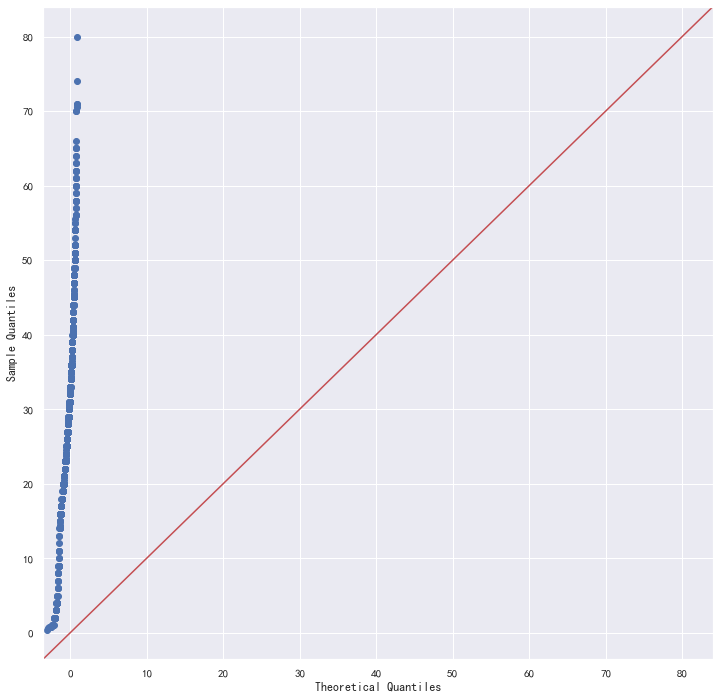

In [25]:
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py
  
sm.qqplot(train_data['Age'], line ='45')
py.show()

前面提到票价与生存率有紧密的联系，那么票价分布与年龄分布是否有某种联系呢？我们可以通过直方图来统计票价的分布，并且将其与年龄分步进行对比。可以看到票价大部分分布在低价区间。

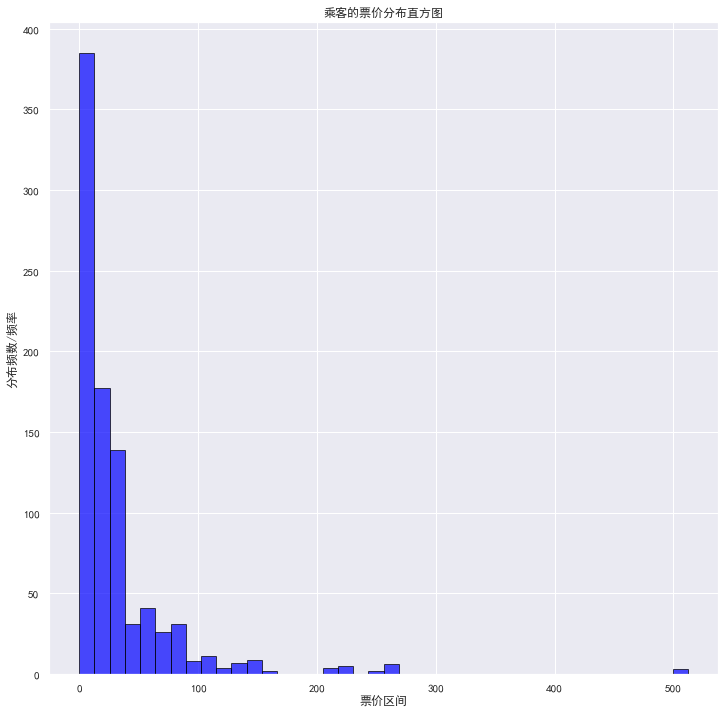

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['axes.unicode_minus'] = False     

plt.hist(train_data['Fare'], bins = 40, facecolor = "blue", edgecolor = "black", alpha = 0.7)
plt.xlabel("票价区间")
plt.ylabel("分布频数/频率")
plt.title("乘客的票价分布直方图")
plt.show()

知道了年龄分布之后，我们就可以分析年龄与生存率之间的关系，这里使用FacetGrid来对数据进行统计，可以清楚地看出年龄与生存率的分布，从图中可以明显看出0-10岁的乘客生存率最高

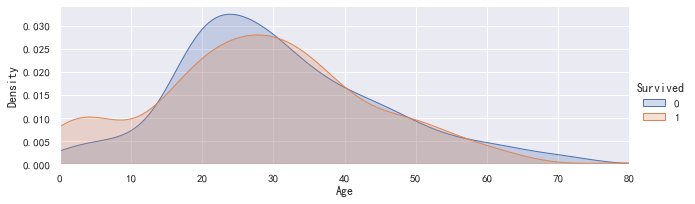

In [19]:
ageFacet = sns.FacetGrid(train_data,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Age',shade=True)
ageFacet.set(xlim=(0,train_data['Age'].max()))
ageFacet.add_legend()

性别的统计分析使用条形图就可以轻松完成，从下图来看，女性的生存率远高于男性，后续在统计时需要将女性这一因素纳入重点考虑范围。

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

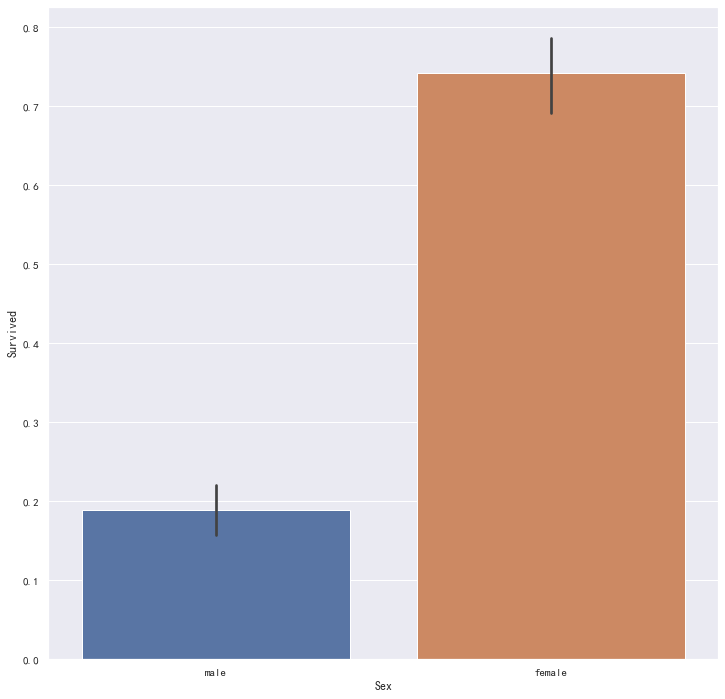

In [20]:
sns.barplot(x='Sex',y='Survived',data=train_data)